# U.S. Medical Insurance Costs

**Step 0:** Problem Understanding – What is the problem? Who does it impact and how much? How is it being solved today and what are some of the gaps?
**Step 1:** Goals – What are the goals of the project? How will we know if our project is successful?
**Step 2:** Actions – What actions or interventions will this work inform?
**Step 3:** Data – What data do you have access to internally? What data do you need?
What can you augment from external and/or public sources?
**Step 4:** Analysis – What analysis needs to be done? Does it involve description, detection, prediction, or behavior change? How will the analysis be validated?
Ethical Considerations:  What are the privacy, transparency, discrimination/equity, and accountability issues around this project and how will you tackle them?
Additional Considerations: How will you deploy your analysis as a new system so that it can be updated and integrated into the organization’s operations? How will you evaluate the new system in the field to make sure it accomplishes your goals? How will you monitor your system to make sure it continues to perform well over time?

In [65]:
# import necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# check how the table looks like
medical_insurance_costs = pd.read_csv("insurance.csv")
medical_insurance_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
# see general information, make sure there is no missing values
medical_insurance_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
females_count = medical_insurance_costs[medical_insurance_costs["sex"] == "female"].count()
females_count
# see if data is evenly distributed in terms of people's sex

age         662
sex         662
bmi         662
children    662
smoker      662
region      662
charges     662
dtype: int64

662 out of 1338 participants are women, which is 49.5%.

In [76]:
age_max = 0
for age in medical_insurance_costs["age"]:
    if age > age_max:
        age_max = age

age_max

64

[18.    23.875 29.75  35.625 41.5   47.375 53.25  59.125 65.   ]


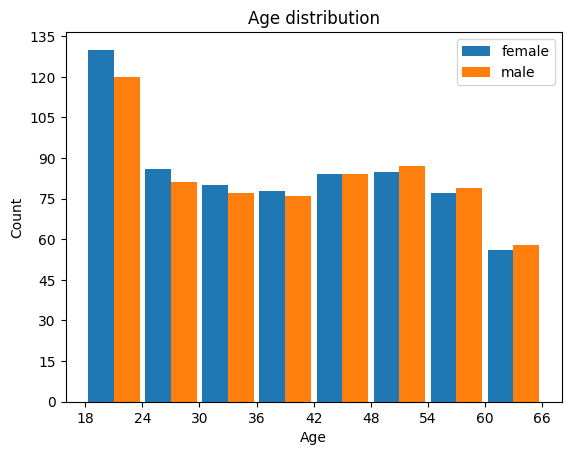

In [77]:
males_rows = medical_insurance_costs[medical_insurance_costs["sex"] == "male"]
females_rows = medical_insurance_costs[medical_insurance_costs["sex"] == "female"]

n, bins, patches = plt.hist(x=[males_rows["age"], females_rows["age"]], range=(18, 65), bins=8, rwidth=0.9)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.yticks(range(0, 136, 15))
plt.xticks(bins, labels=[x for x in range(18, 67, 6)])
print(bins)
plt.legend(medical_insurance_costs["sex"])
plt.show()

In [85]:
# finding average age of all patients
avg_age = medical_insurance_costs["age"].mean()
avg_age

39.20702541106129

In [78]:
# change non-numeric columns with two categories (male and female for sex column and smoker,non-smoker for smoker column) into 0 and 1 values
medical_insurance_costs["sex"] = medical_insurance_costs["sex"].map({'female': 0, 'male': 1})
medical_insurance_costs["smoker"] = medical_insurance_costs["smoker"].map({'yes': 1, 'no': 0})

Now I will draw a correlation heatmap to find correlations between all factors and charges (price), Mainly we want to see how strongly a person being smoker affects how much they pay for insurance.

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


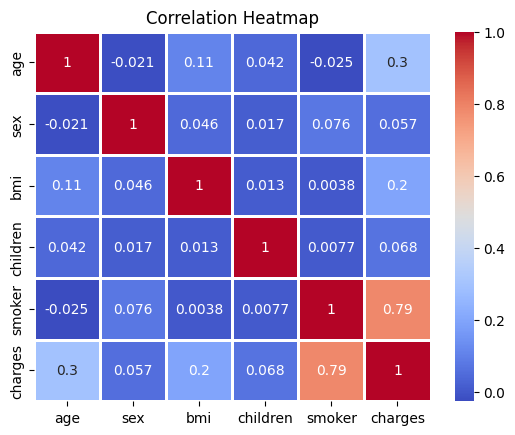

In [79]:
plt.figure()
print(medical_insurance_costs.head())
# select numeric values to eliminate state's column
numeric_data = medical_insurance_costs.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

No strong correlations of any factors with "chargers" besides "smoker", which is expected. Smoking increases chances for many severe illnesses, so treating smoker patients is almost always required more effort, time, and money. The second-biggest value here is the correlation between age and charges, which is 0.3. It is not a strong relation because health conditions of people mostly depend on various other strong factors, and aging does not always mean being much weaker.

In [88]:
# counting hoy many patients there are from each state
states_count = {}
for state in medical_insurance_costs["region"]:
    states_count[state] = states_count.get(state, 0) + 1

states_count

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}